<a href="https://colab.research.google.com/github/santhimaddipudi/Python-work/blob/master/ML1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust


import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
import pandas as pd
import io

state = pd.read_csv("/content/sample_data/state.csv")
print(state.head(8))

         State  Population  Murderrate Abbreviation
0      Alabama     4779736         5.7           AL
1       Alaska      710231         5.6           AK
2      Arizona     6392017         4.7           AZ
3     Arkansas     2915918         5.6           AR
4   California    37253956         4.4           CA
5     Colorado     5029196         2.8           CO
6  Connecticut     3574097         2.4           CT
7     Delaware      897934         5.8           DE


##Mean and median

In [ ]:
state['Population'].mean()

6162876.3

In [ ]:
state['Population'].median()

4436369.5


A trimmed mean  is the mean of a dataset that has been calculated after removing a specific percentage of the smallest and largest values from the dataset.

In [ ]:
#calculate 20% trimmed mean
from scipy import stats
stats.trim_mean(state['Population'], 0.2)

4413915.966666667

weighted mean and weighted median

In [ ]:
pip install weightedstats

In [ ]:
import numpy as np
import weightedstats as ws
ws.weighted_mean(state['Murderrate'], weights=state['Population'])
##ws.weighted_median(state['Murderrate'], weights=state['Population'])

4.445833981123394

#Standard deviation and quantiles




In [ ]:
print(state['Population'].std())

6848235.347401142


In [ ]:
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


In [ ]:
#Median absolute deviation from the median can be calculated with a method in statsmodels
#print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336


Variance and standard deviation are the most widespread and routinely reported
statistics of variability.
• Both are sensitive to outliers.

#qualtiles of murderrate

In [ ]:
state['Murderrate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])


0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murderrate, dtype: float64

#box plot that shows the 75th and 25th percentile and outliers

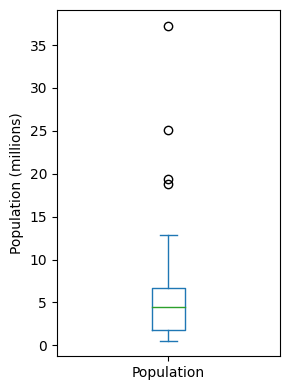

In [ ]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()
#the circles outside plot are outliers

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


#Frequency table

In [ ]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

#histogram

Text(0.5, 0, 'Population (millions)')

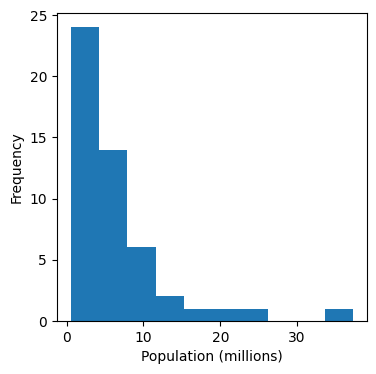

In [ ]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

#density lines:pandas provides the density method to create a density plot.

Text(0.5, 0, 'Murder Rate (per 100,000)')

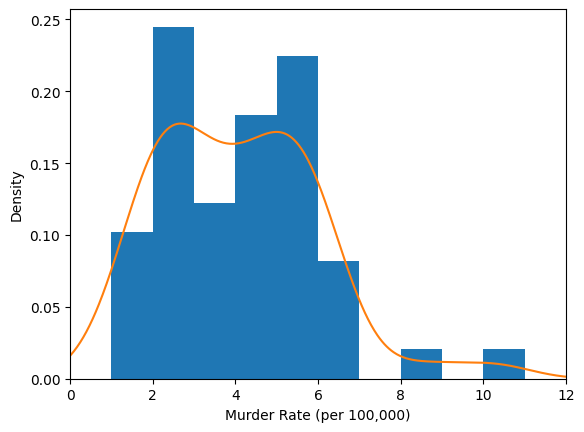

In [ ]:
ax = state['Murderrate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murderrate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

##Correlation

In [7]:
import pandas as pd
from scipy.stats import pearsonr

# Import your data into Python
df = pd.read_csv("/content/sample_data/Auto.csv")

# Convert dataframe into series
list1 = df['weight']
list2 = df['mpg']

# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449
...,...,...
295,25.4,3530
296,23.0,3900
297,27.2,3190
298,23.9,3420


The standard way to visualize the relationship between two measured data variables is
with a scatterplot

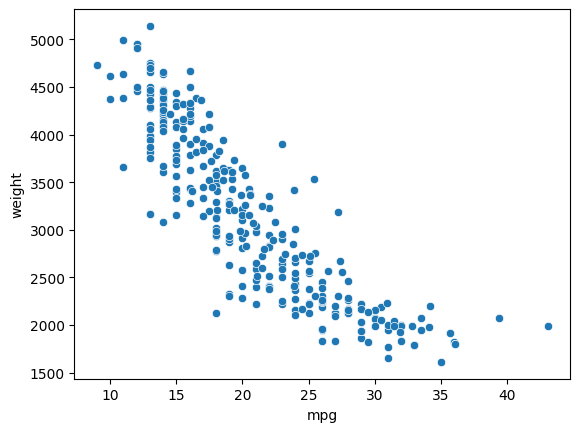

In [8]:
import seaborn as sns
sns.scatterplot(x="mpg", y="weight", data=df);